In [73]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

### Dataset Preparation

In [74]:
# Loading the MNIST datset
digits = load_digits()

In [75]:
X = digits.data
Y = digits.target

In [76]:
print(X.shape,Y.shape)

(1797, 64) (1797,)


9


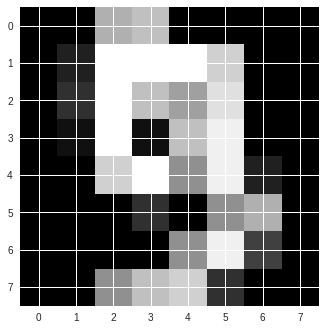

In [77]:
plt.imshow(X[9].reshape((8,8)),cmap="gray")
print(Y[9])
plt.show()

In [78]:
print(X[9])

[ 0.  0. 11. 12.  0.  0.  0.  0.  0.  2. 16. 16. 16. 13.  0.  0.  0.  3.
 16. 12. 10. 14.  0.  0.  0.  1. 16.  1. 12. 15.  0.  0.  0.  0. 13. 16.
  9. 15.  2.  0.  0.  0.  0.  3.  0.  9. 11.  0.  0.  0.  0.  0.  9. 15.
  4.  0.  0.  0.  9. 12. 13.  3.  0.  0.]


### Training the Models

In [79]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [80]:
mnb = MultinomialNB()
gnb = GaussianNB()

In [81]:
# Training the data
mnb.fit(X,Y)
gnb.fit(X,Y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [82]:
print(mnb.score(X,Y))
print(gnb.score(X,Y))

0.9053978853644964
0.8580968280467446


In [83]:
cross_val_score(gnb,X,Y,scoring="accuracy",cv=10).mean()

0.8113904407200497

In [84]:
cross_val_score(mnb,X,Y,scoring="accuracy",cv=10).mean()

0.8797858472998138

In [85]:
# Multinomial Naive Bayes gives better result because, the features are discrete

### Confusion Matrix

In [86]:
from sklearn.metrics import confusion_matrix

In [87]:
Y_mnb = mnb.predict(X)
cnf_matrix = confusion_matrix(Y,Y_mnb)

In [88]:
import confusion_matrix_plot as cplot

Confusion matrix, without normalization
[[175   0   0   0   3   0   0   0   0   0]
 [  0 137  14   0   0   1   2   0  13  15]
 [  0   7 160   0   0   0   0   0   8   2]
 [  0   0   2 159   0   2   0   5   8   7]
 [  1   0   0   0 173   0   0   4   3   0]
 [  0   0   0   0   1 157   1   1   2  20]
 [  0   2   0   0   1   1 176   0   1   0]
 [  0   0   0   0   0   0   0 178   1   0]
 [  0  11   1   0   1   0   1   1 154   5]
 [  0   1   0   1   1   1   0  11   7 158]]


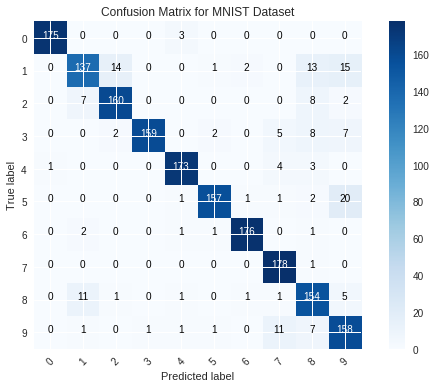

In [89]:
cplot.plot_confusion_matrix(cnf_matrix,classes=np.arange(10),title="Confusion Matrix for MNIST Dataset")

In [90]:
Y_gnb = gnb.predict(X)
cnf_matrix = confusion_matrix(Y,Y_gnb)
print(cnf_matrix)

[[176   0   0   0   1   0   0   1   0   0]
 [  0 154   0   0   0   0   3   5  14   6]
 [  0  13 113   0   0   1   1   0  49   0]
 [  0   2   2 145   0   6   0   7  20   1]
 [  1   1   0   0 152   1   2  21   3   0]
 [  0   0   0   3   0 169   1   6   2   1]
 [  0   1   0   0   0   1 179   0   0   0]
 [  0   0   0   0   1   1   0 177   0   0]
 [  0   8   0   1   0   3   0  12 150   0]
 [  1   6   0   5   1   3   0  17  20 127]]


Confusion matrix, without normalization
[[176   0   0   0   1   0   0   1   0   0]
 [  0 154   0   0   0   0   3   5  14   6]
 [  0  13 113   0   0   1   1   0  49   0]
 [  0   2   2 145   0   6   0   7  20   1]
 [  1   1   0   0 152   1   2  21   3   0]
 [  0   0   0   3   0 169   1   6   2   1]
 [  0   1   0   0   0   1 179   0   0   0]
 [  0   0   0   0   1   1   0 177   0   0]
 [  0   8   0   1   0   3   0  12 150   0]
 [  1   6   0   5   1   3   0  17  20 127]]


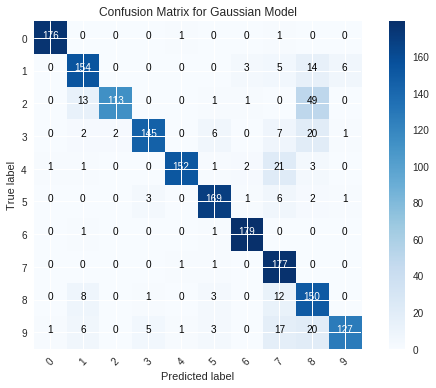

In [91]:
cplot.plot_confusion_matrix(cnf_matrix,classes=np.arange(10),title="Confusion Matrix for Gaussian Model")